In [ ]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [ ]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

In [ ]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 400,400
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [ ]:
#Task-1

gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glPointSize(6)  
gl.glColor3f(0,1,0)



def findzone(x1,y1,x2,y2):
  Zone=0

  dx=x2-x1
  dy=y2-y1

  if abs(dx)<=abs(dy):
    if dx>0 and dy>0:
      Zone=1
    elif dx<0 and dy>0:
      Zone=2
    elif dx<0 and dy<0:
      Zone=5
    elif dx>0 and dy<0:
      Zone=6

  else:
    if dx>0 and dy>0:
      Zone=0
    elif dx<0 and dy>0:
      Zone=3
    elif dx<0 and dy<0:
      Zone=4
    elif dx>0 and dy<0:
      Zone=7

  return Zone



def convertzone0(x,y,temp):

  a,b=0,0
  if temp== 0:
    a,b=x,y
  elif temp== 1:
    a,b=y,x
  elif temp== 2:
    a,b=y,-x
  elif temp== 3:
    a,b=-x,y
  elif temp== 4:
    a,b=-x,-y
  elif temp== 5:
    a,b=-y,-x
  elif temp== 6:
    a,b=-y,x
  elif temp== 7:
    a,b=x,-y

  return a,b



def convert_to_original(x,y,temp):

  g,h=0,0

  if temp== 0:
    g,h=x,y
  elif temp== 1:
    g,h=y,x
  elif temp== 2:
    g,h=-y,x
  elif temp== 3:
    g,h=-x,y
  elif temp== 4:
    g,h=-x,-y
  elif temp== 5:
    g,h=-y,-x
  elif temp== 6:
    g,h=-y,x
  elif temp== 7:
    g,h=x,-y

  return g,h


def DrawLine(x1,y1,x2,y2):
  temp=findzone(x1,y1,x2,y2)
  
  p,q=convertzone0(x1,y1,temp)
  m,n=convertzone0(x2,y2,temp)
  
  dx = m-p
  dy = n-q

  d=2*dy-dx

  incE=2*dy
  incNE = 2 * (dy - dx)

  y = q
  x = p

  if dx==0:
    
    while y<=y2:
      c,d=convert_to_original(x,y,temp)

      gl.glBegin(gl.GL_POINTS)
      gl.glVertex2f(c,d)
      gl.glEnd()

      y+=0.0001

  while x<=x2:
    r,t=convert_to_original(x,y,temp)

    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(r,t)
    gl.glEnd()

    if d>0:
      d+=incNE
      y+=0.0001
    else:
      d+=incE

    x+=0.0001

In [ ]:
x=input("Enter student_ID: ")
last_two_digits= x[-1:-3:-1]
dig=last_two_digits[::-1]


def Zero(tik):
    DrawLine(tik+-0.8,-0.6,tik+-0.8,0.6)
    DrawLine(tik+-0.8,-0.6,tik+-0.3,-0.6)
    DrawLine(tik+-0.8,0.6,tik+-0.3,0.6)
    DrawLine(tik+-0.3,-0.6,tik+-0.3,0.6)

def One(tik):
    DrawLine(tik+-0.55,-0.6,tik+-0.55,0.6)
    DrawLine(tik+-0.8,0.4,tik+-0.55,0.6)
    DrawLine(tik+-0.8,-0.6,tik+-0.3,-0.6)
  
def Two(tik):
    DrawLine(tik+-0.8,0.6,tik+-0.3,0.6)
    DrawLine(tik+-0.8,-0.6,tik+-0.8,0.1)
    DrawLine(tik+-0.8,-0.6,tik+-0.3,-0.6)
    DrawLine(tik+-0.3,0.1,tik+-0.3,0.6)
    DrawLine(tik+-0.8,0.1,tik+-0.3,0.1)

def Three(tik):
    DrawLine(tik+-0.8,0.6,tik+-0.3,0.6)
    DrawLine(tik+-0.8,0.1,tik+-0.3,0.1)
    DrawLine(tik+-0.8,-0.6,tik+-0.3,-0.6)
    DrawLine(tik+-0.3,-0.6,tik+-0.3,0.6)

def Four(tik):
    DrawLine(tik+-0.8,0.1,tik+-0.3,0.1)
    DrawLine(tik+-0.3,-0.6,tik+-0.3,0.6)
    DrawLine(tik+-0.8,0.1,tik+-0.8,0.6)
    
def Five(tik):
    DrawLine(tik+-0.3,-0.6,tik+-0.3,0.1)
    DrawLine(tik+-0.8,-0.6,tik+-0.3,-0.6)
    DrawLine(tik+-0.8,0.6,tik+-0.3,0.6)
    DrawLine(tik+-0.8,0.1,tik+-0.8,0.6)
    DrawLine(tik+-0.8,0.1,tik+-0.3,0.1)
    
def Six(tik):
    DrawLine(tik+-0.8,-0.6,tik+-0.8,0.6)
    DrawLine(tik+-0.3,-0.6,tik+-0.3,0.1)
    DrawLine(tik+-0.8,-0.6,tik+-0.3,-0.6)
    DrawLine(tik+-0.8,0.6,tik+-0.3,0.6)
    DrawLine(tik+-0.8,0.1,tik+-0.3,0.1)

def Seven(tik):
    DrawLine(tik+-0.8,0.6,tik+-0.3,0.6)
    DrawLine(tik+-0.3,-0.6,tik+-0.3,0.6)

def Eight(tik):
    DrawLine(tik+-0.8,0.1,tik+-0.3,0.1)
    DrawLine(tik+-0.8,-0.6,tik+-0.3,-0.6)
    DrawLine(tik+-0.8,0.6,tik+-0.3,0.6)
    DrawLine(tik+-0.8,-0.6,tik+-0.8,0.6)
    DrawLine(tik+-0.3,-0.6,tik+-0.3,0.6)

def Nine(tik):
    DrawLine(tik+-0.8,0.1,tik+-0.3,0.1)
    DrawLine(tik+-0.3,-0.6,tik+-0.3,0.6)
    DrawLine(tik+-0.8,0.6,tik+-0.3,0.6)
    DrawLine(tik+-0.8,0.1,tik+-0.8,0.6)

Enter student_ID: 20101194



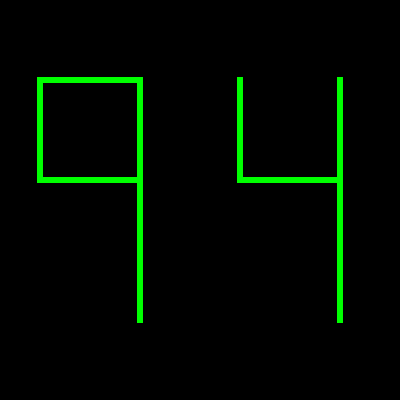

In [ ]:
def Display(digits): 
   
   i=0

   while i<=1:
    
    if digits[i]=="0":
          Zero(i)
    elif digits[i]=="1":
          One(i)
    elif digits[i]=="2":
          Two(i)
    elif digits[i]=="3":
          Three(i)
    elif digits[i]=="4":
          Four(i)
    elif digits[i]=="5":
          Five(i)
    elif digits[i]=="6":
          Six(i)
    elif digits[i]=="7":
          Seven(i)
    elif digits[i]=="8":
          Eight(i)
    else:
          Nine(i)

    i+=1

Display(dig)

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)